<a href="https://colab.research.google.com/github/JF11579/Colab/blob/main/Network_RE_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This is an idea that did not work out.  I had the idea that instead of forelornly trying to recruit top Listing Agents brokers could instead recruit those Selling agents that consitantly sold those top Listing Agents properties.

### I said *forlornley* becasue a top Listing Agent is likely already working on a 80/20 split or better.  What more can a different broker offer?

### My idea was to identify which agents year  after year sell the top Listing Agents properties.

### All of the sales data are real and come froma  NYC suburb over the past 10 years.

## **OF COURSE ALL DISCUSSION OF COMMISION IS JUST HYPOTHETICAL**



### The names have been annoymized.

### In the table below we compare an agent who sells ten million dollars with three other agents who's total sales between then only come to ten million.

### The last column, the *Split Btwn Agent-Co column*, is what made me think there might be some merit to this approach.  After ten million in sales the top agent on a 80/20 split pays the broker `$40 thousand while the the other three combined pay their brokers a combined $100 thousand`

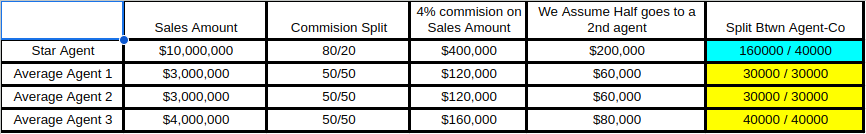

### How much more succesful are the top Listing Agents compared with their peers?

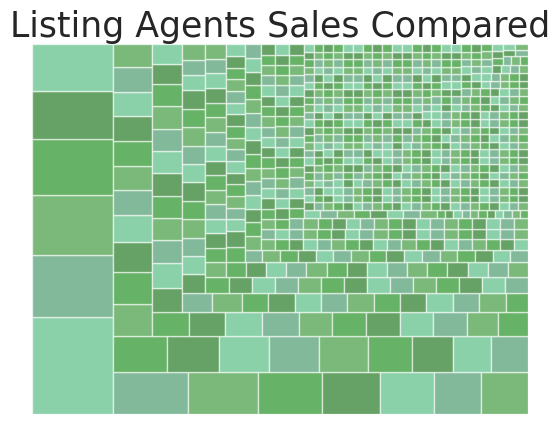

### Basically I wanted to change the way brokers view their market from a Pie-chart view of the world.

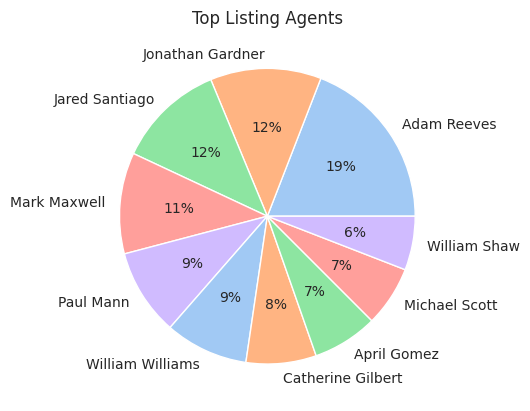

### To Network graph view of things

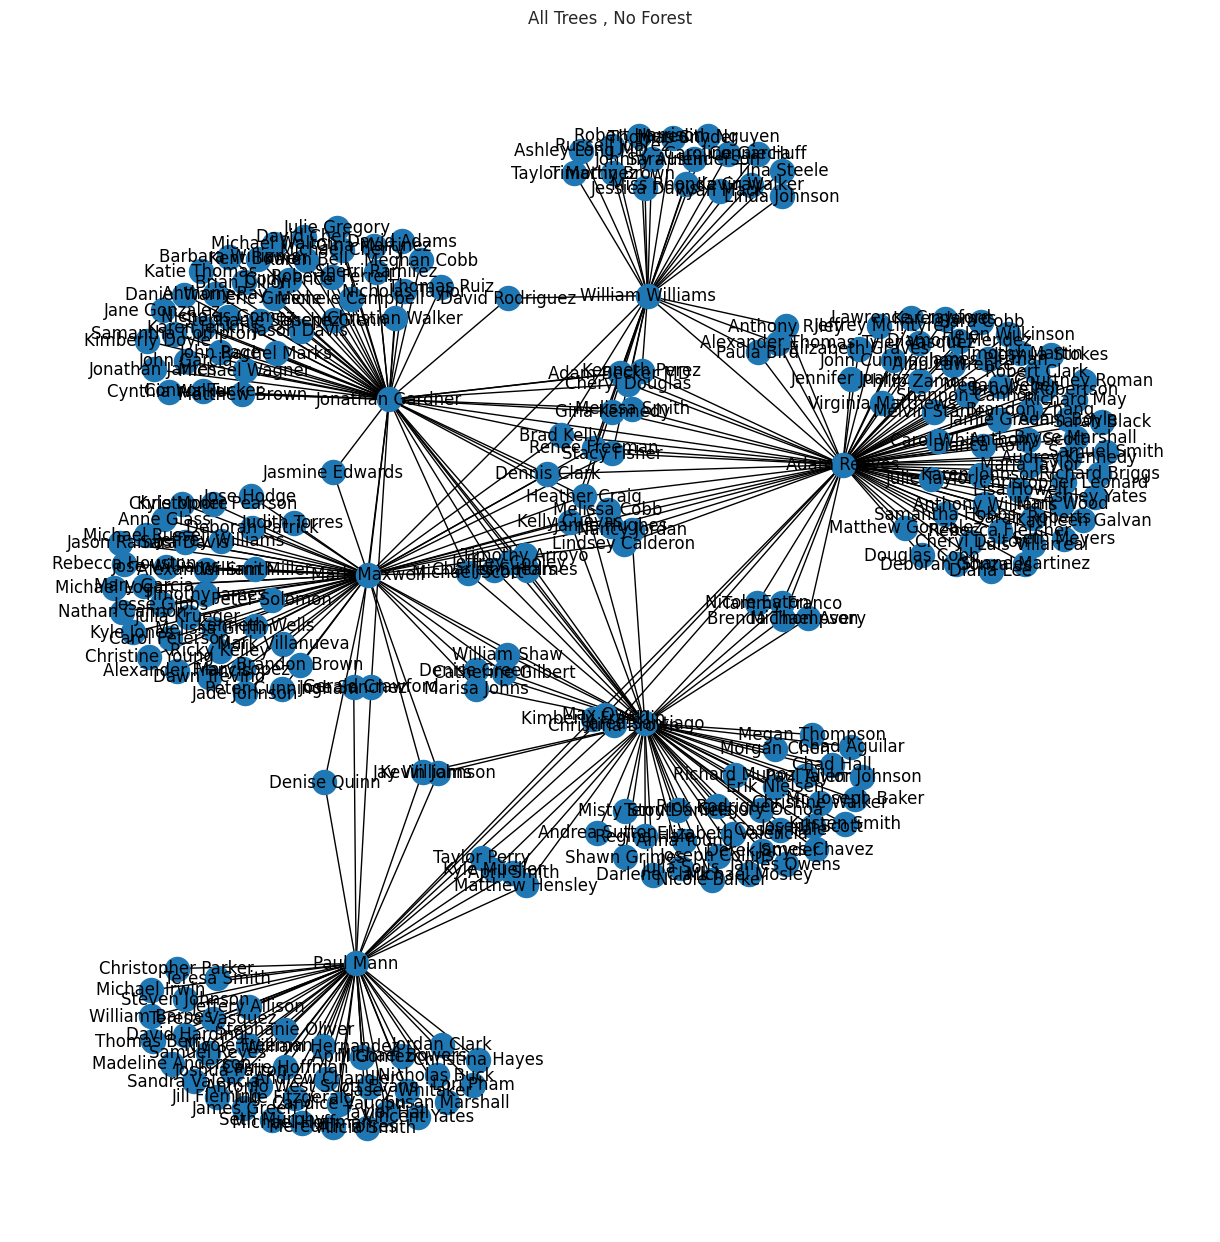

## The underlying ordiliness of the Network graph lured me into thinking there was more than there actually is

### Here are the top 10 Listing Agents

|index|Listing\_Agent|Selling\_Agent|Listing\_Date|Year|Agent\_Count|
|---|---|---|---|---|---|
|15|Nicole Eaton|April Gomez|2013-02-25 00:00:00|2013|10|
|19|Julian Macias|Cynthia Harris|2013-03-03 00:00:00|2013|13|
|21|Jonathan Gardner|David Rodriguez|2013-03-05 00:00:00|2013|68|
|23|Michael Scott|Joseph Diaz|2013-03-12 00:00:00|2013|37|
|25|William Shaw|Jonathan Graham|2013-03-15 00:00:00|2013|33|

### Let us look at a few top Listers  seperately

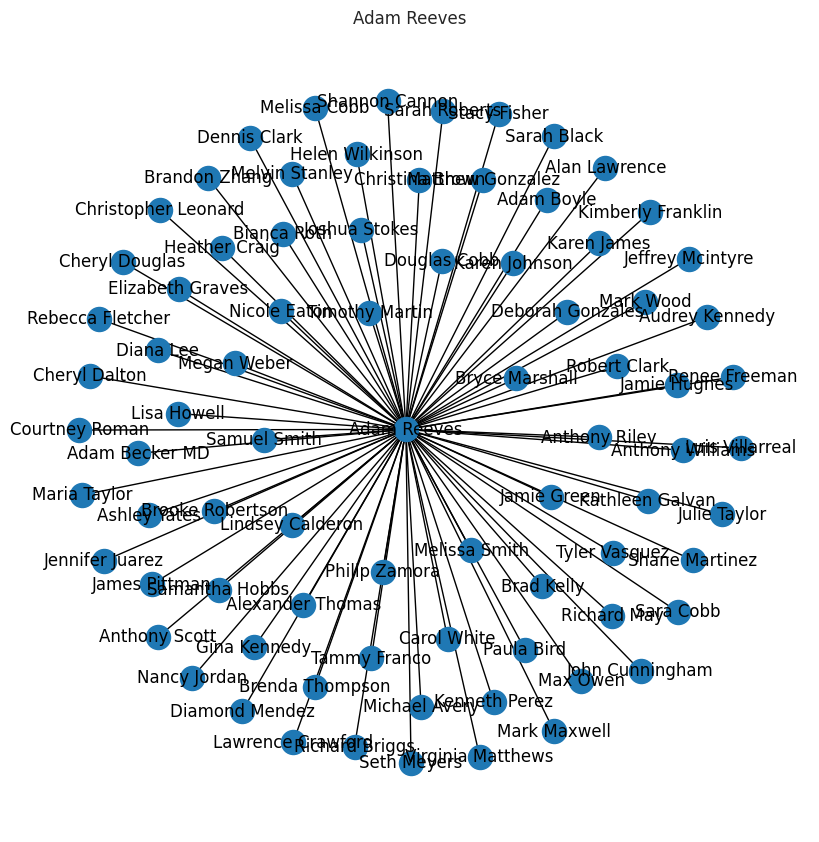

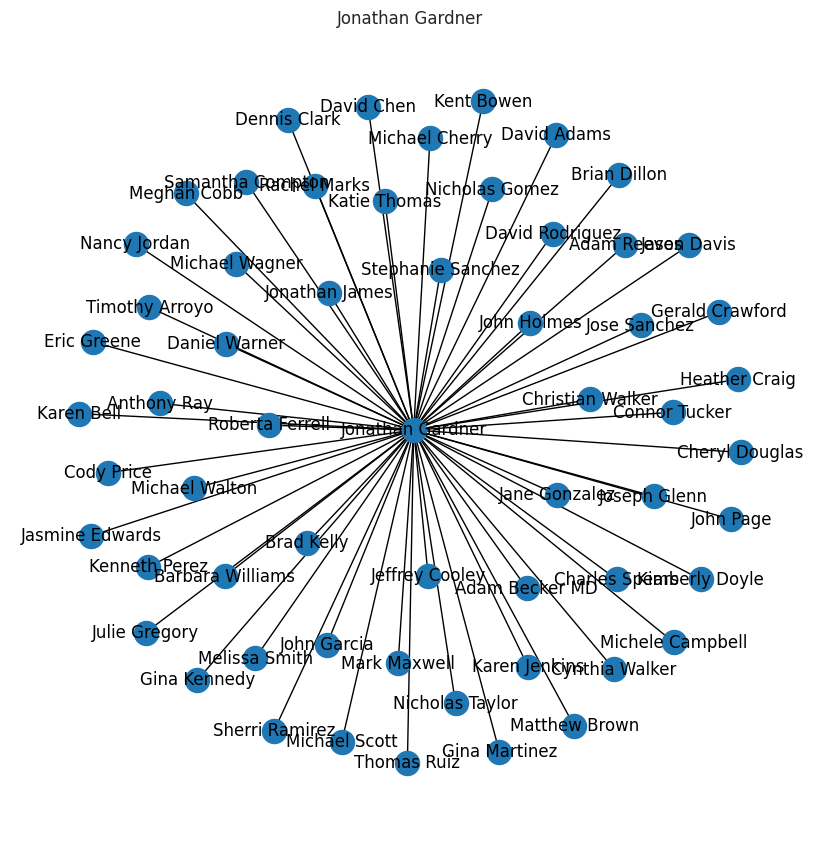

### Recall we are looking for which agents which year after year are the seller of the top lister's properties.

### These graphs show which agents sold an Adam Reeves property each year but are  a little unwieldy to compare.

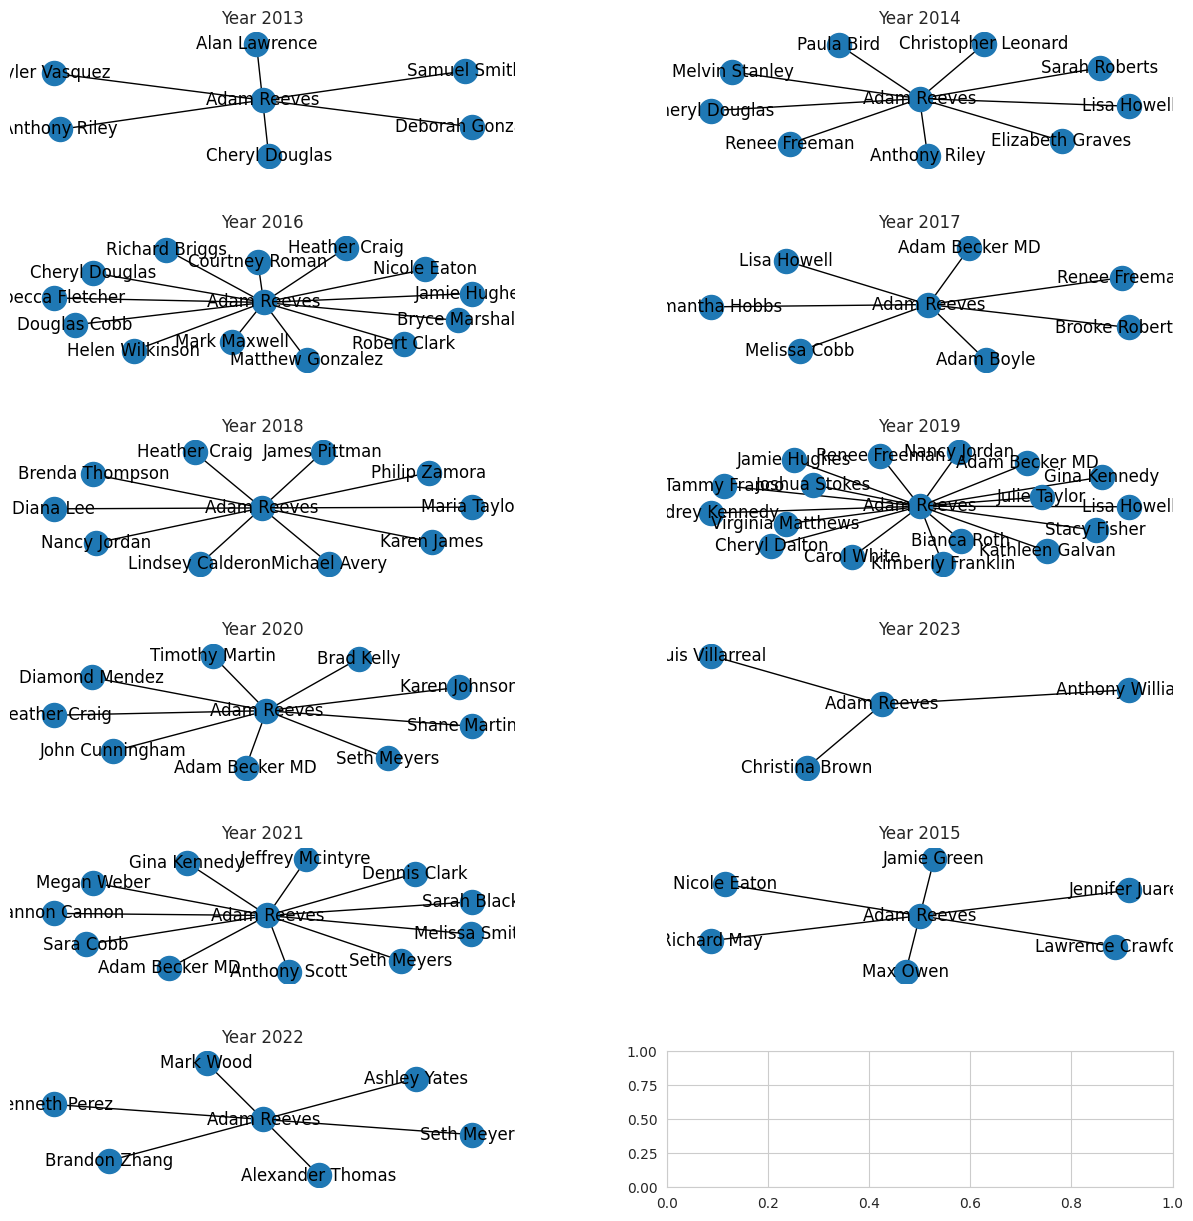

### Let us take the same info and try a different graph.  

### Below on the left is every agent who sold an Adam Reeve's property in the past 10 years.  What we were expecting to see were some agents with an almost contijnuous horizontal row of dots indicating that each year they sold at least one of Adam's properties.

### Instead it looks like each year there are a handful of agents and each year that changes.

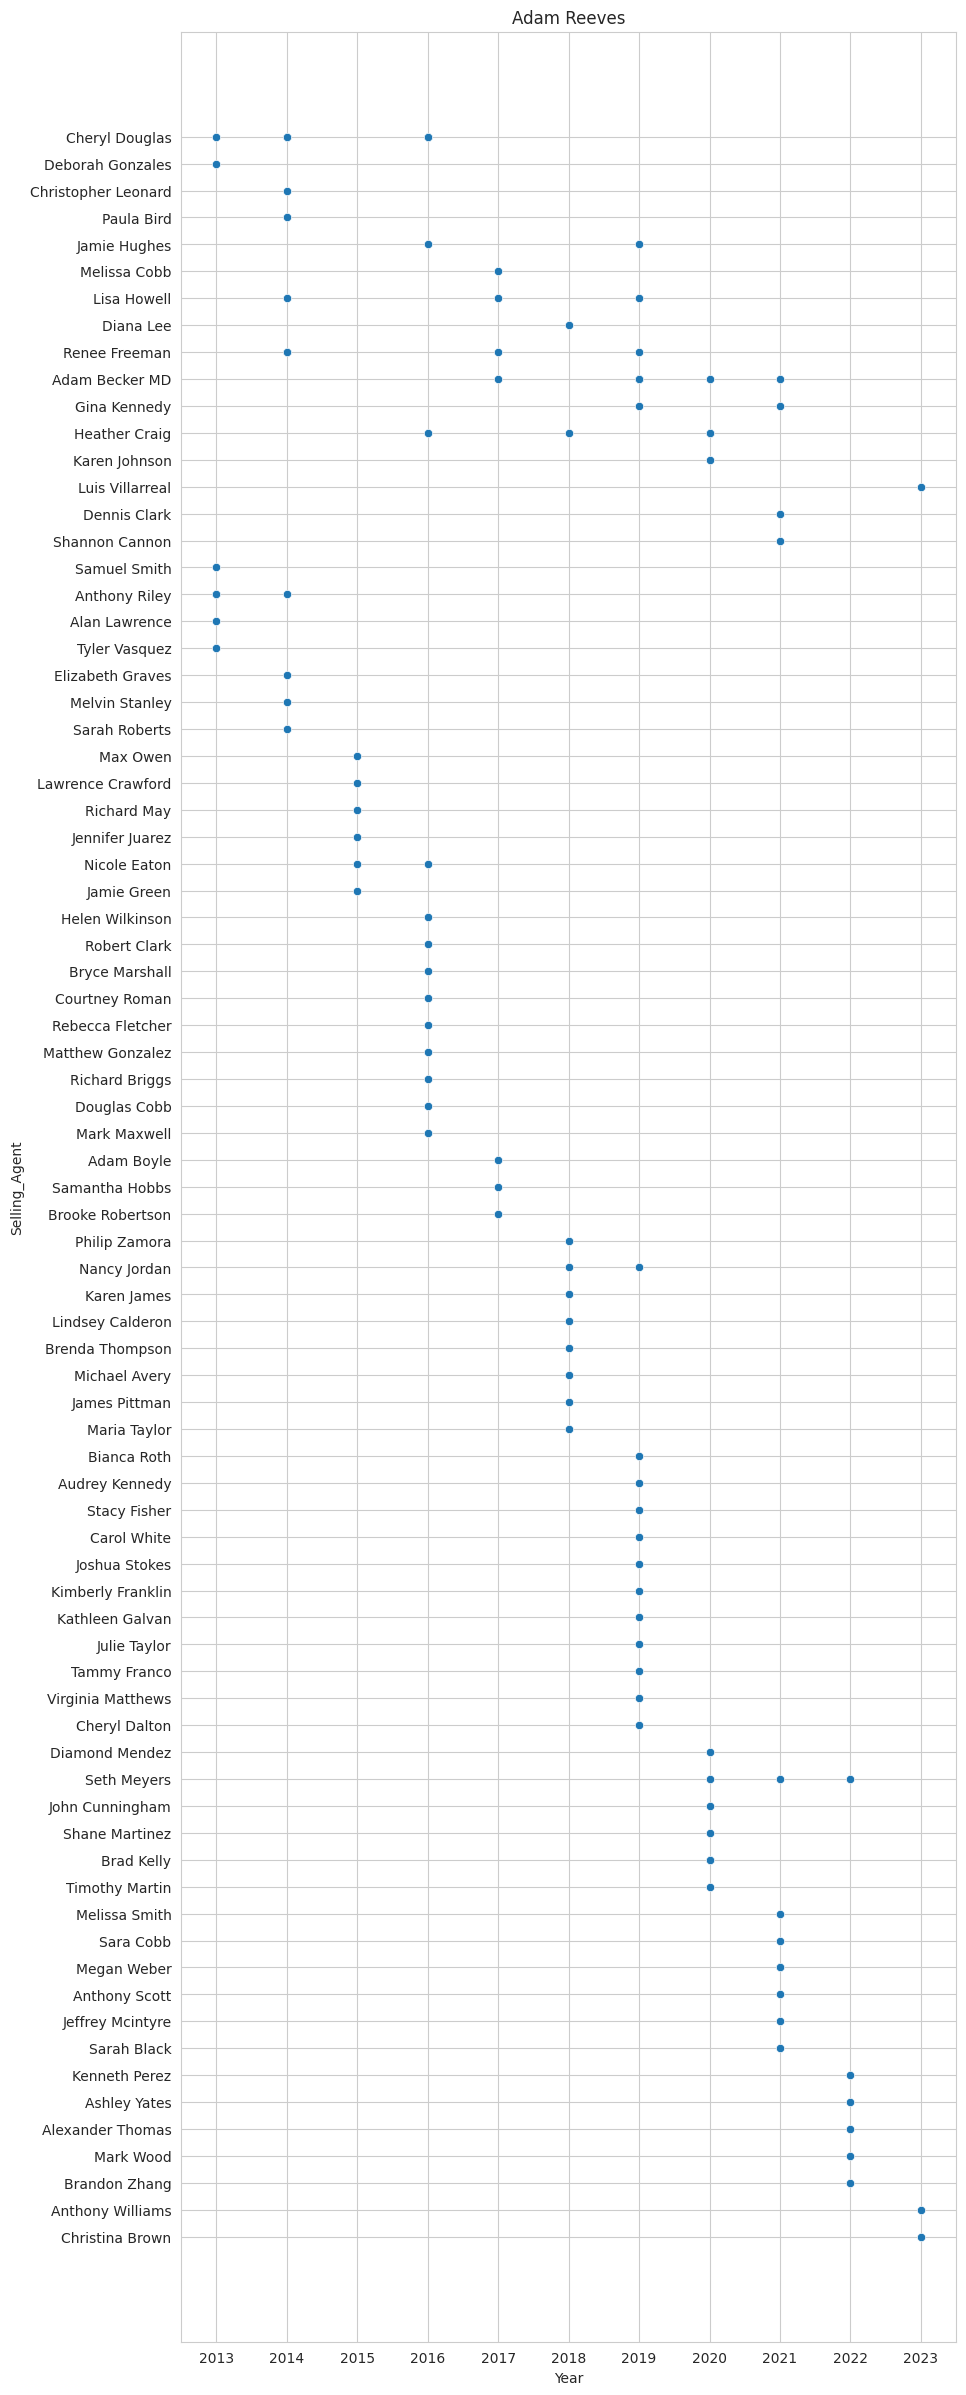

### What if we grouped all of the top Listing Agents together and treated them like a single entity?

### There is no point in cleaning up the graph: we can see there are no agents with a run of selling even the combined group of of top Listers.

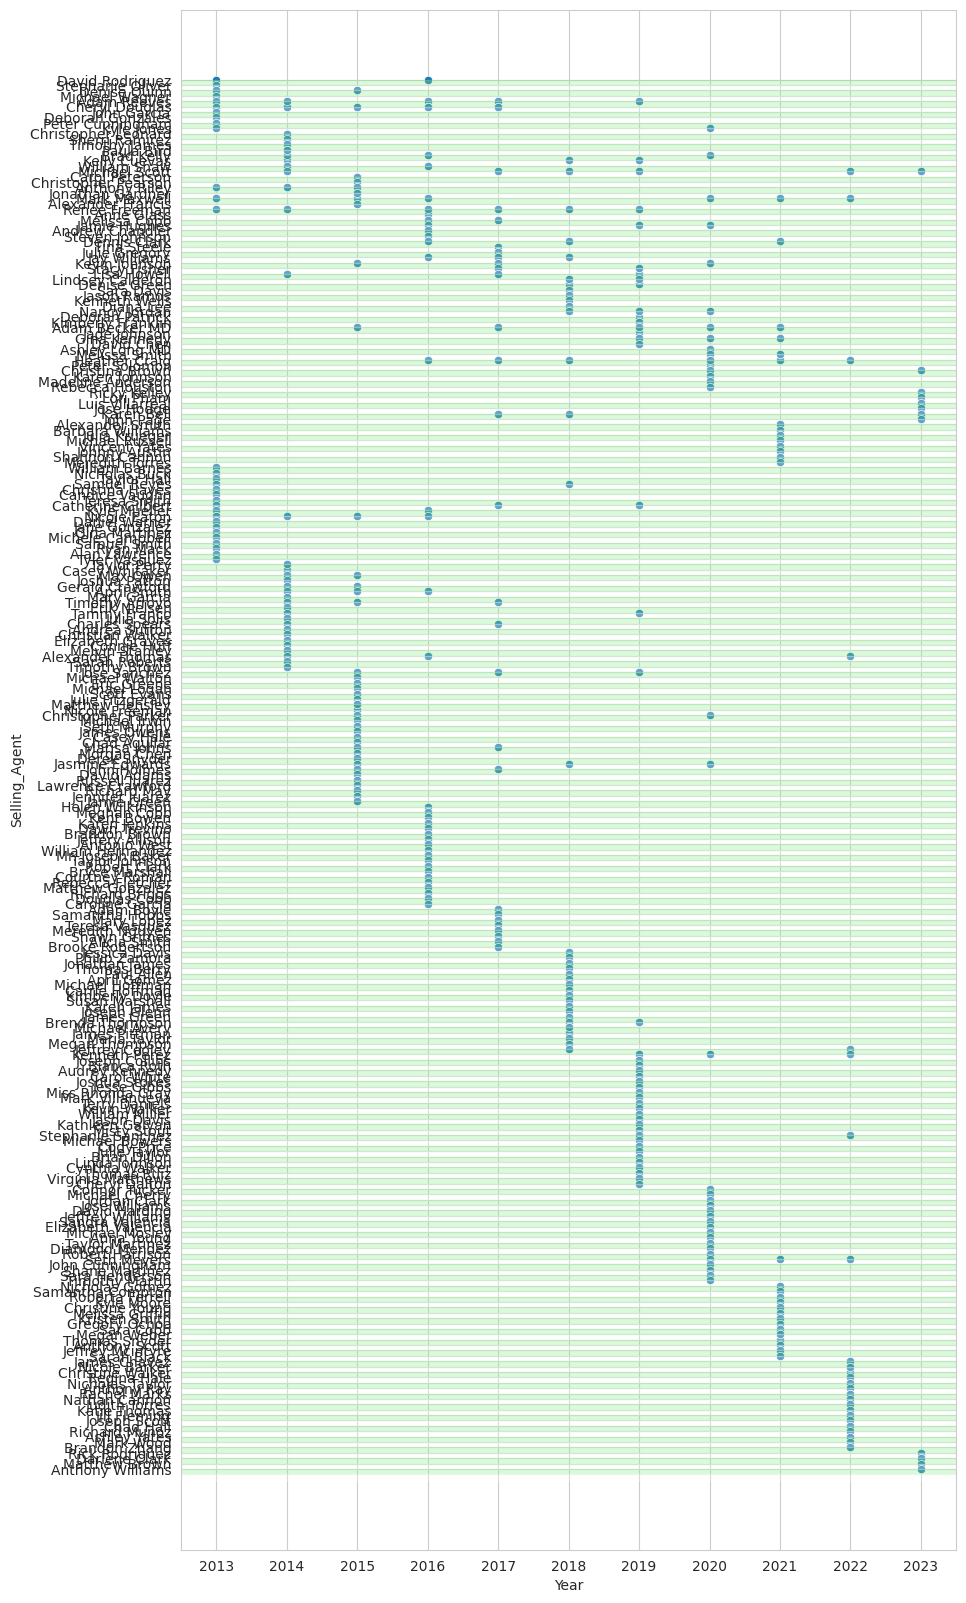

### This outcome is not just dissapointing but unexpected.  I have worked in this market and it certainly feel like there  teams.  It seems some Listing agetns often get a certain skind of house and some Selling agents consistantly get buyers bfor that kind of house.  But the data does not siupport this.  

# Code Below

# Libraries

In [1]:
!pip install faker
!pip install --upgrade networkx
!pip install squarify

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import squarify
import seaborn as sns
from faker import Faker

# Options

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change to the directory containing your CSV
%cd /content/drive/MyDrive/DATA/Real_Estate_Data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DATA/Real_Estate_Data


In [5]:
#SC_1 = pd.read_csv('Sea_Cliff_2013.csv')
df = pd.read_csv('SeaCliff_2013_to_23.csv')

In [27]:
df.shape

(1077, 222)

In [6]:
df2 = pd.read_csv('GlnCv_GH_GWL_2023_combined_2.csv')

In [29]:
df2.shape


(2670, 221)

## Join the Sea cliff And Glen cove-glen Head- Glenwood landing data

In [7]:
data = pd.concat([df, df2])


In [8]:
data.shape

(3747, 222)

## Pre-processing

In [9]:
df = data

In [10]:
df= df.drop_duplicates(subset= 'ML#' , keep = 'first')
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df = df.dropna(subset=['Selling_Agent'])
df = df.dropna(subset=['Listing_Agent'])
df = df[['Listing_Agent' , 'Selling_Agent', 'Listing_Date']]
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'])
df['Year'] = df['Listing_Date'].dt.year
df = df[df['Selling_Agent'] != df['Listing_Agent']]

<ipython-input-10-60ad122797ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)


## Annonymize the names

In [11]:
# Create a Faker instance to generate consistent fake names
fake = Faker()
Faker.seed(123)  # Set a seed for reproducibility

# Create a mapping of original names to consistent fake names
name_mapping = {}

for name in set(df['Listing_Agent'].unique()).union(df['Selling_Agent'].unique()):
    name_mapping[name] = fake.name()

# Replace the names in both columns using the mapping
df['Listing_Agent'] = df['Listing_Agent'].map(name_mapping)
df['Selling_Agent'] = df['Selling_Agent'].map(name_mapping)

# What does our data look like now?

### Agent_Count is how many listings that agent had inthe previous 10 years.

In [12]:
df.head(5)

Listing_Agent    Selling_Agent Listing_Date  Year
13         Sheryl Porter   Brianna Sparks   2013-02-14  2013
15         Amanda Savage  Brandy Mccarthy   2013-02-25  2013
19  Christopher Mcdonald   Vincent Mendez   2013-03-03  2013
21            Marc Burns      David Smith   2013-03-05  2013
23           Paul Duncan   Jessica Carter   2013-03-12  2013

## how much More do top agents make?  Keep in

# Tree plot

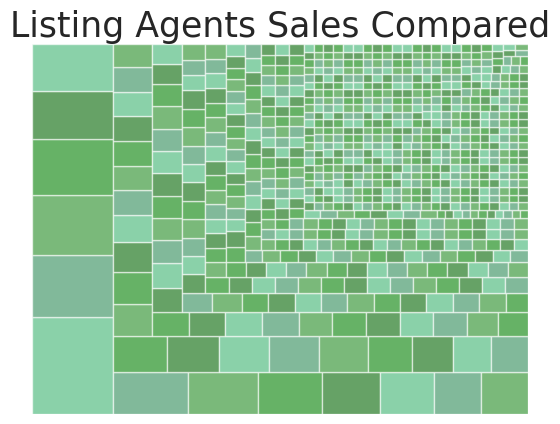

In [14]:
tree_data = df

# Filter data from the DataFrame df
ListingAgentData = tree_data['Listing_Agent'].value_counts().reset_index()
ListingAgentData.columns = ['Listing_Agent', 'counts']

# Set custom green colors
colors = ['#3CB371', '#2E8B57', '#228B22', '#008000', '#006400']

# Set seaborn plot style
sns.set_style(style="whitegrid")

# Get sizes and labels from the data
sizes = ListingAgentData['counts'].values
labels = ListingAgentData['Listing_Agent']

# Plot the treemap with Squarify
squarify.plot(sizes=sizes, label=None, alpha=0.6, color=colors).set(title='Listing Agent Treemap')

# Add text below the title
plt.title("Listing Agents Sales Compared", fontsize=25)
plt.text(50, 100, "", ha="center", va="top" , fontsize=20)  # Adjust the y-coordinate (-0.15) here
plt.axis('off')
plt.show()

## Lets limist our look to only those agents with 2 or more listings.

In [40]:
df['Agent_Count'] = df.groupby('Listing_Agent')['Listing_Agent'].transform('count')
df = df[df['Agent_Count'] >= 2]

In [42]:
# tree_data = df

# # Filter data from the DataFrame df
# ListingAgentData = tree_data['Listing_Agent'].value_counts().reset_index()
# ListingAgentData.columns = ['Listing_Agent', 'counts']

# # Set custom green colors
# colors = ['#3CB371', '#2E8B57', '#228B22', '#008000', '#006400']

# # Set seaborn plot style
# sns.set_style(style="whitegrid")

# # Get sizes and labels from the data
# sizes = ListingAgentData['counts'].values
# labels = ListingAgentData['Listing_Agent']

# # Plot the treemap with Squarify
# squarify.plot(sizes=sizes, label=labels, alpha=0.6, color=colors).set(title='Listing Agent Treemap')

# # Add text below the title
# plt.title("Listing Agents compared (Only Agents With More Than One Listing Displayed)", fontsize=25)
# plt.text(50, 100, "", ha="center", va="top" , fontsize=20)  # Adjust the y-coordinate (-0.15) here
# plt.axis('off')
# plt.show()

# Pie plot

Text(0.5, 1.0, 'Top Listing Agents')

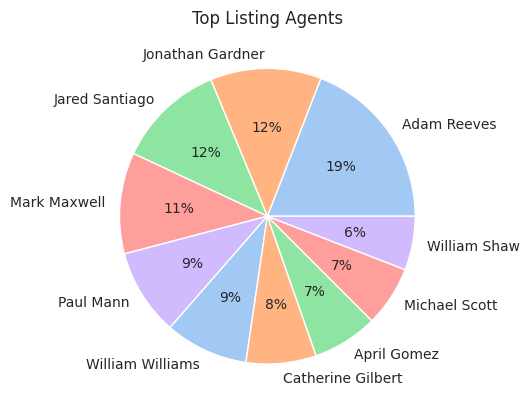

In [43]:
pie = df
# prompt: filter rows . unique. keep only first of each Listing_Agent

pie = pie.drop_duplicates(subset= 'Listing_Agent' , keep = 'first')
pie = pie.sort_values(by='Agent_Count', ascending=False)
pie = pie.head(10)
data = pie['Agent_Count']
labels = pie['Listing_Agent']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
#plt.show()

# Add title to the chart
plt.title('Top Listing Agents')

# Displaying chart

# Network Graph

Text(0.5, 1.0, 'All Trees , No Forest')

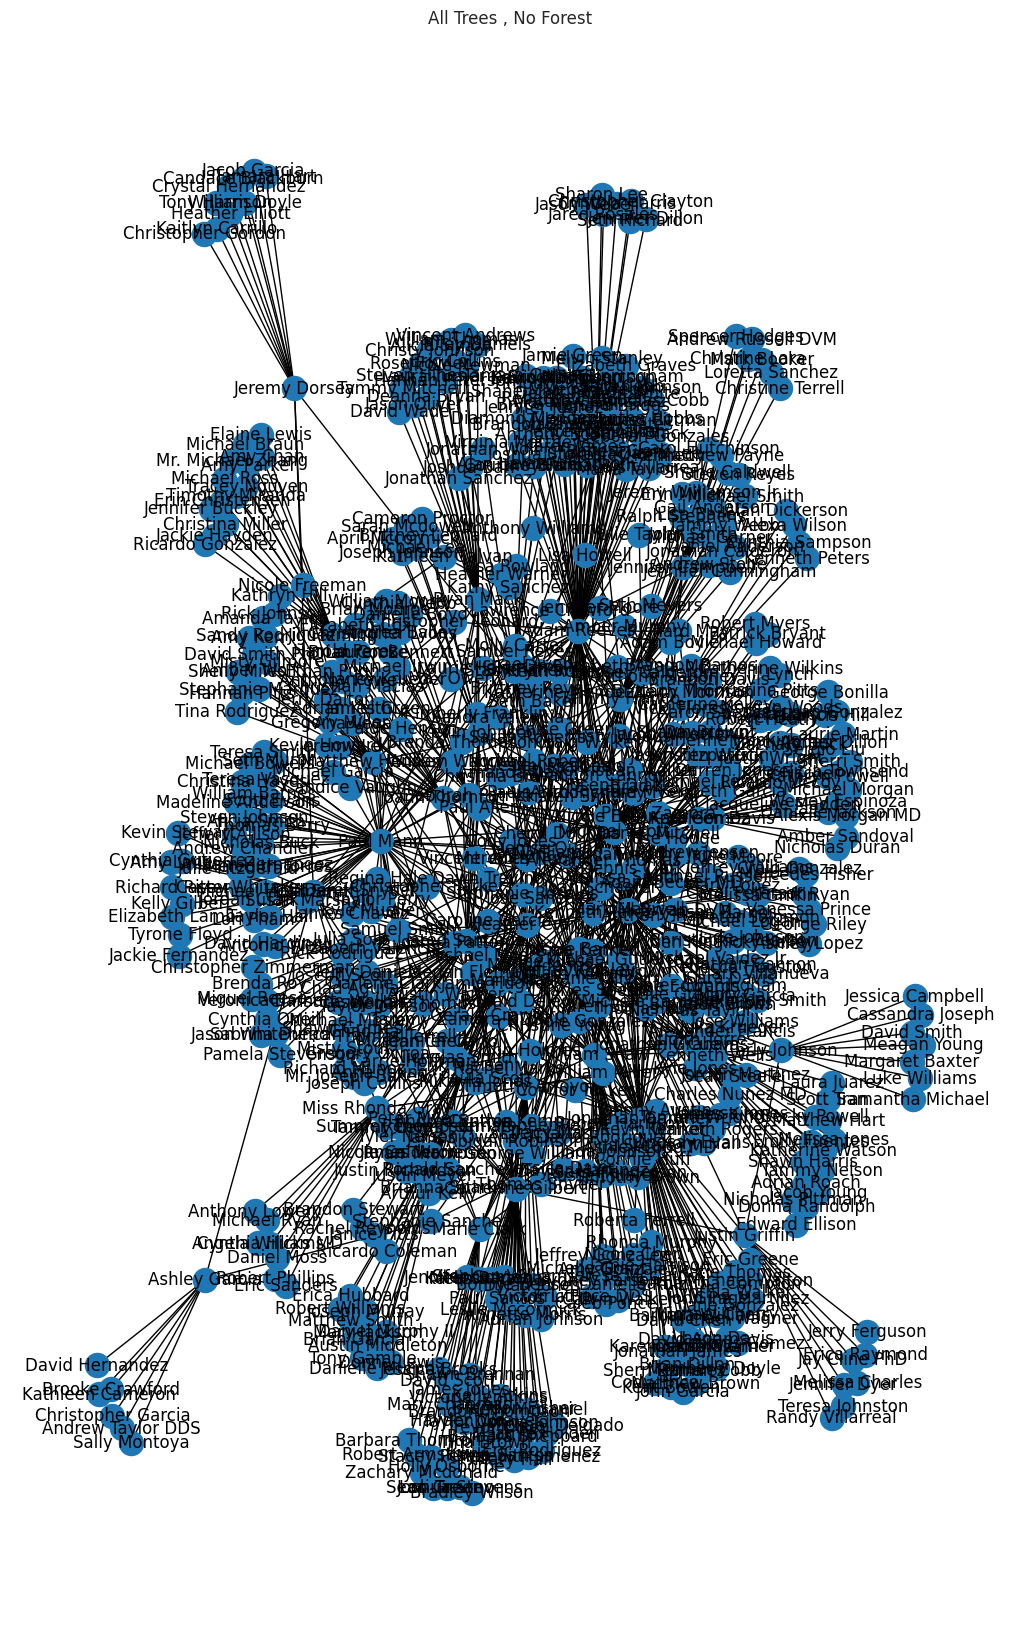

In [44]:
df = df[df['Agent_Count'] >= 10]

data = df

#G = nx.Graph()
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data, 'Listing_Agent' , 'Selling_Agent')
from matplotlib.pyplot import figure
figure(figsize=(10, 16))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.title('All Trees , No Forest' )

### All Forest, no trees.  we will filter out agents wqith less than 15 listinigs ini thelast 10 yrs.

Text(0.5, 1.0, 'All Trees , No Forest')

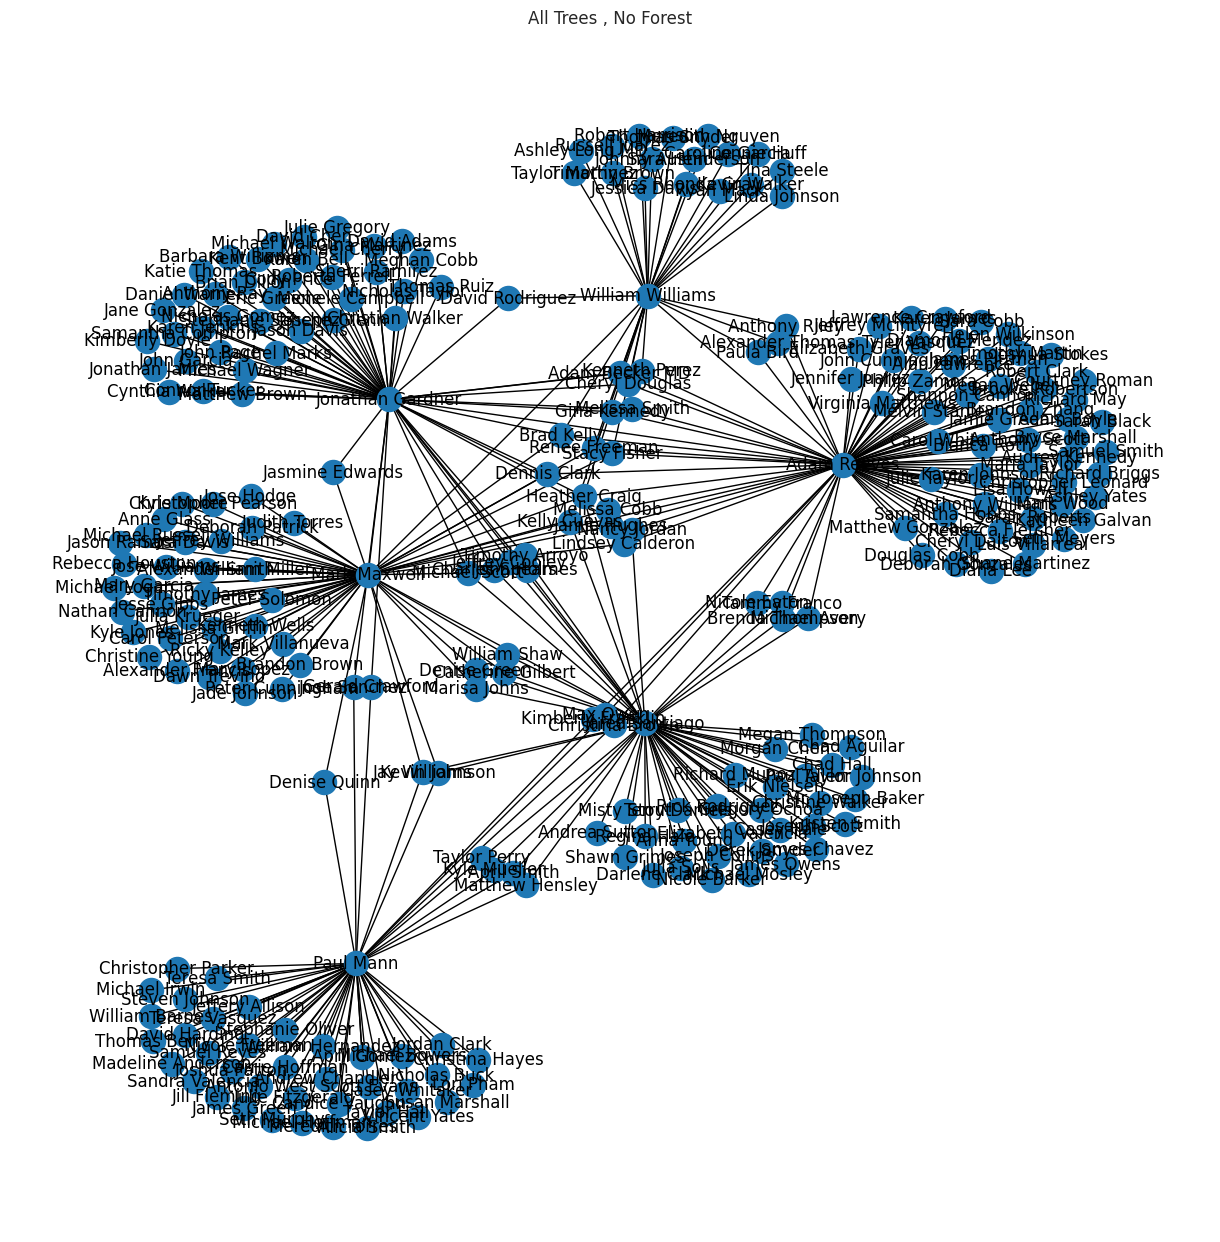

In [49]:
df = df[df['Agent_Count'] >= 50]

data = df

#G = nx.Graph()
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data, 'Listing_Agent' , 'Selling_Agent')

# Increase the space between the nodes.
node_spacing = 2


from matplotlib.pyplot import figure
figure(figsize=(12, 12))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.title('All Trees , No Forest' )

## Let us look at some individual listing agents.

## Here are the top 10 listers

In [76]:
sorted_Listing_agents

Listing_Agent     Selling_Agent Listing_Date  Year  Agent_Count
50        Adam Reeves    Cheryl Douglas   2013-05-06  2013          107
21   Jonathan Gardner   David Rodriguez   2013-03-05  2013           68
219    Jared Santiago     Michael Scott   2014-11-10  2014           66
39       Mark Maxwell      Denise Quinn   2013-04-15  2013           62
27          Paul Mann  Stephanie Oliver   2013-04-01  2013           53
47   William Williams       Adam Reeves   2013-04-30  2013           51

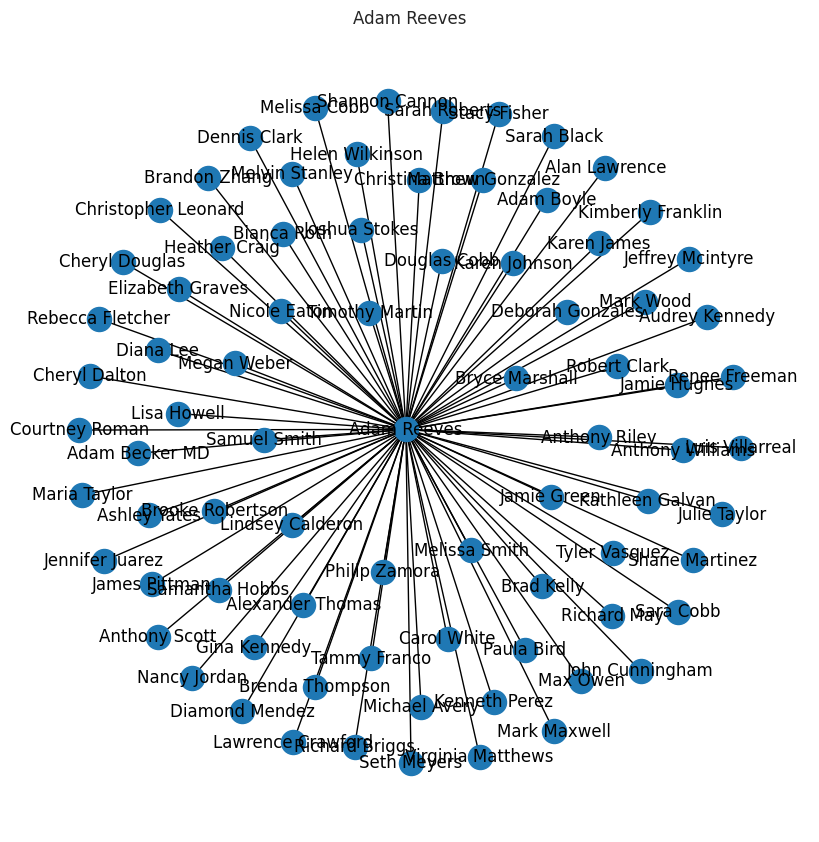

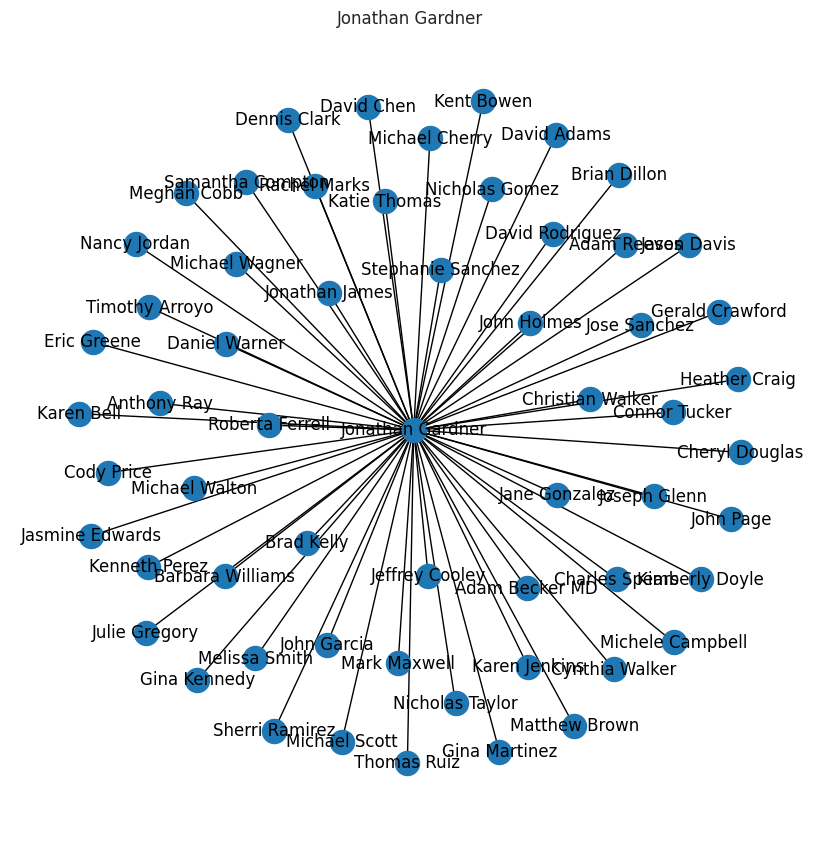

In [53]:
sorted_Lsiting_agents = df.drop_duplicates(subset=['Listing_Agent'] , keep='first')

sorted_Listing_agents = sorted_Lsiting_agents .sort_values(by=['Agent_Count'], ascending=False)
sorted_Listing_agents = sorted_Listing_agents.head(10)

sorted_Listing_agents

Listing_Agent     Selling_Agent Listing_Date  Year  Agent_Count
50        Adam Reeves    Cheryl Douglas   2013-05-06  2013          107
21   Jonathan Gardner   David Rodriguez   2013-03-05  2013           68
219    Jared Santiago     Michael Scott   2014-11-10  2014           66
39       Mark Maxwell      Denise Quinn   2013-04-15  2013           62
27          Paul Mann  Stephanie Oliver   2013-04-01  2013           53
47   William Williams       Adam Reeves   2013-04-30  2013           51

In [ ]:
Adam_Reeves = df.loc[df['Listing_Agent'] == 'Adam Reeves']

Adam_Reeves


## Now a network graph of just Adam Reeves

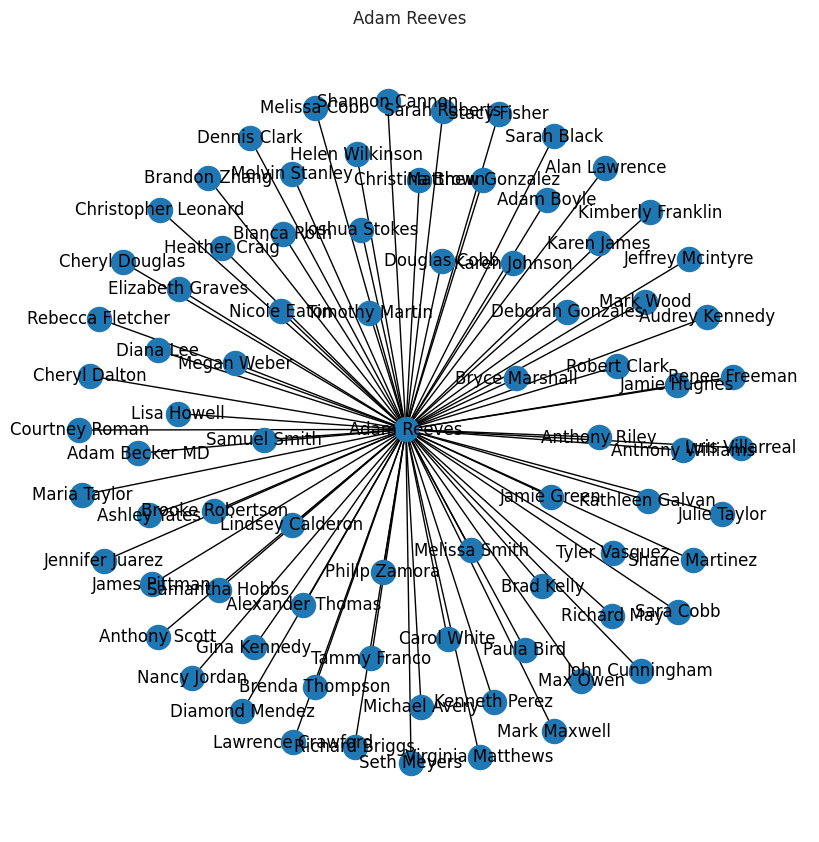

In [77]:

data = Adam_Reeves
#data

#G = nx.Graph()
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data, 'Listing_Agent' , 'Selling_Agent')

# Increase the space between the nodes.
node_spacing = 2


from matplotlib.pyplot import figure
figure(figsize=(8, 8))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.title('Adam Reeves' )
plt.show()

## Jonathan Gardner

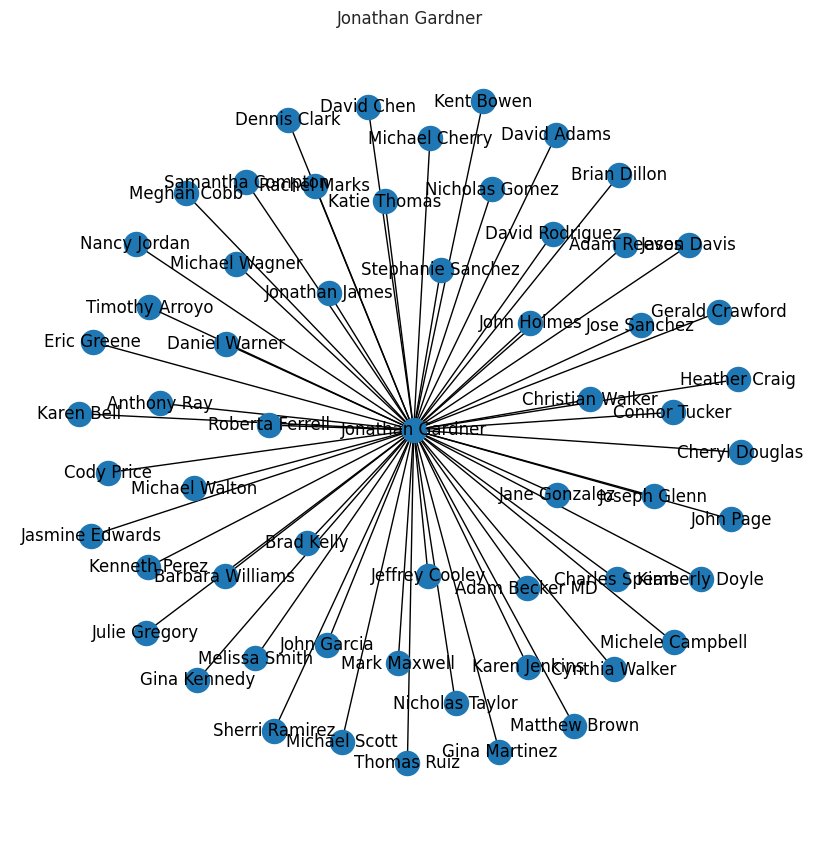

In [78]:
Jonathan_Gardner = df.loc[df['Listing_Agent'] == 'Jonathan Gardner']

data = Jonathan_Gardner
#data

#G = nx.Graph()
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data, 'Listing_Agent' , 'Selling_Agent')

# Increase the space between the nodes.
node_spacing = 2


from matplotlib.pyplot import figure
figure(figsize=(8, 8))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.title('Jonathan Gardner' )
plt.show()

## William Williams

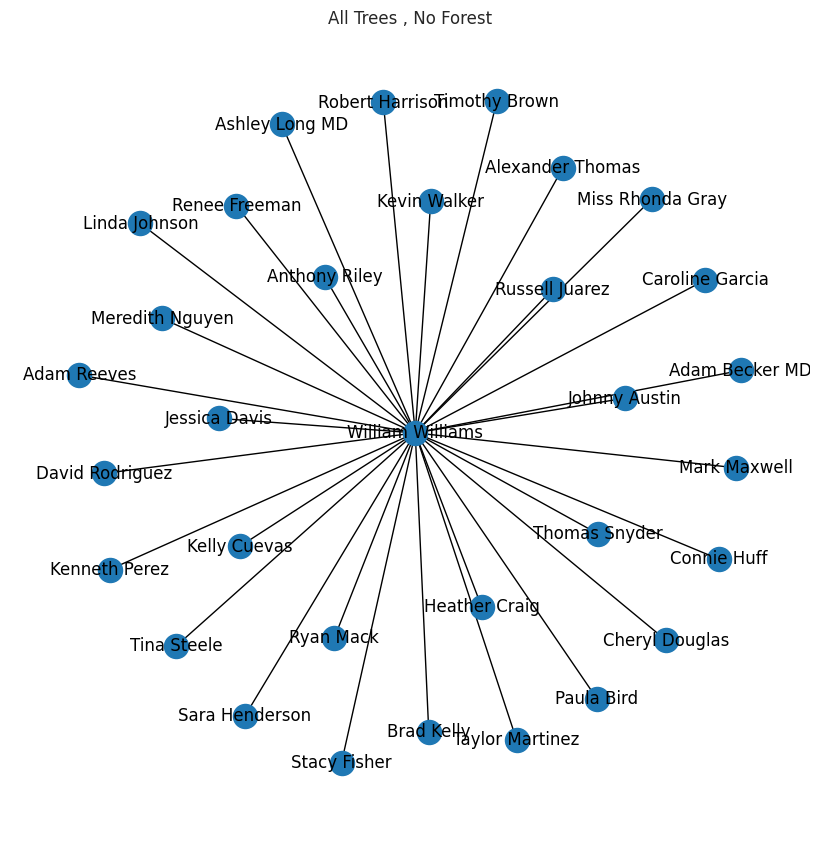

In [57]:
William_Williams = df.loc[df['Listing_Agent'] == 'William Williams']

data = William_Williams
#data

#G = nx.Graph()
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data, 'Listing_Agent' , 'Selling_Agent')

# Increase the space between the nodes.
node_spacing = 2


from matplotlib.pyplot import figure
figure(figsize=(8, 8))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.title('All Trees , No Forest' )
plt.show()

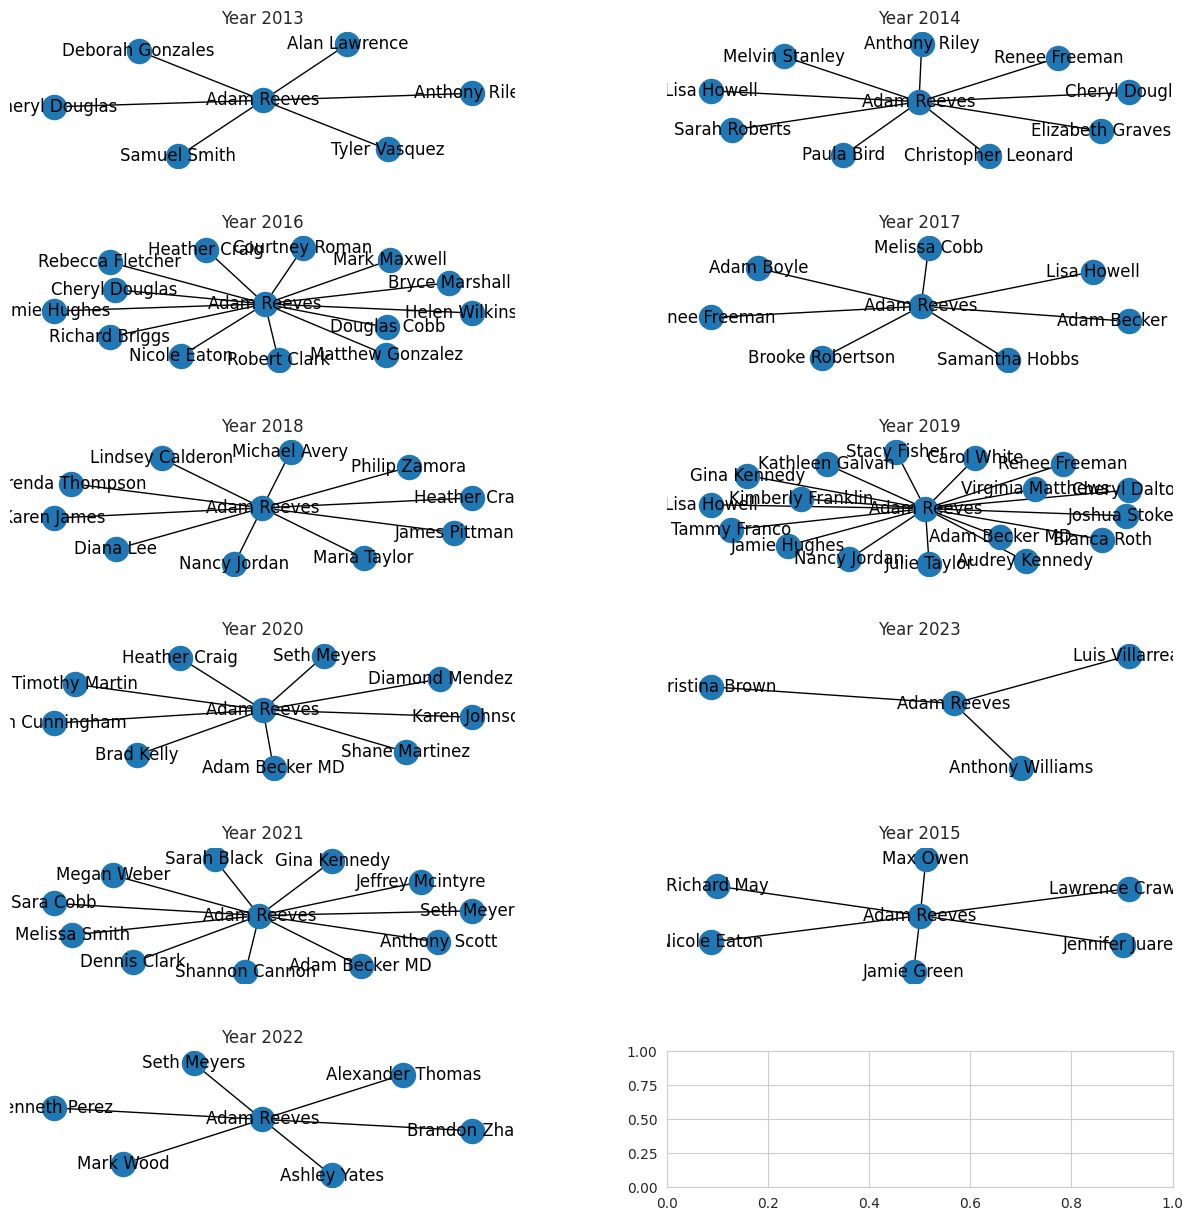

In [59]:
# import networkx as nx
# import matplotlib.pyplot as plt

# Catherine_Wilkins = df.loc[df['Listing_Agent'] == 'Catherine Wilkins']

# #
data = Adam_Reeves

# Get unique years in your data
unique_years = data['Year'].unique()

# Calculate the number of rows and columns for the grid
num_rows = (len(unique_years) + 1) // 2
num_cols = 2

# Create a grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust spacing between subplots

# Loop through each year and create a plot
for i, year in enumerate(unique_years):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    # Filter the data for the current year
    year_data = data[data['Year'] == year]

    # Create a directed graph from the filtered data
    G = nx.DiGraph()
    G = nx.from_pandas_edgelist(year_data, 'Listing_Agent', 'Selling_Agent')

    # Increase the space between the nodes
    node_spacing = 2

    # Draw the graph on the current subplot
    nx.draw(G, with_labels=True, ax=ax)
    ax.set_title(f'Year {year}')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Adam Reeves')

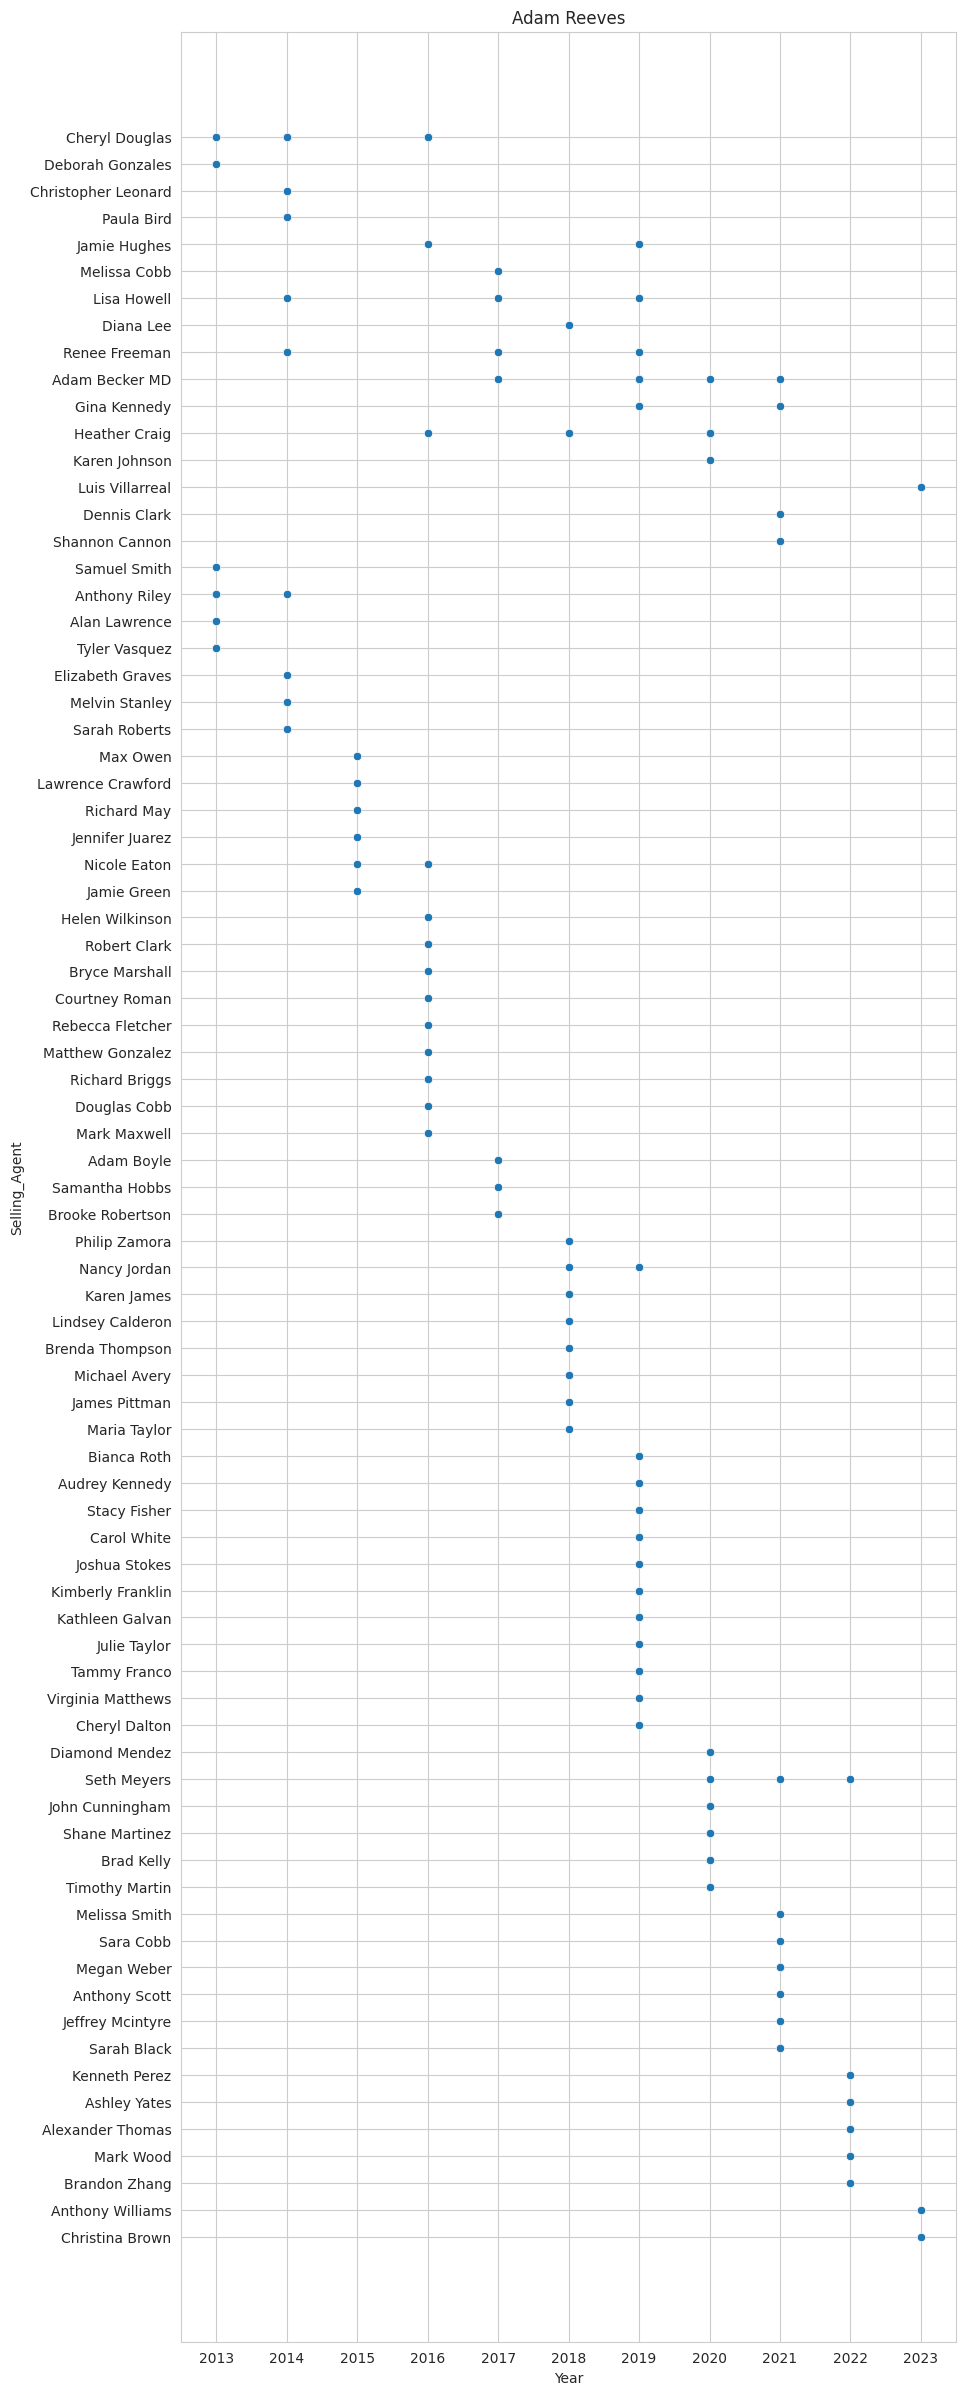

In [80]:
data = Adam_Reeves

# Create a subplot with a width of 20 inches and a height of 10 inches.
fig, ax = plt.subplots(figsize=(10, 30))

# Plot the scatterplot.
sns.scatterplot(x= 'Year', y= 'Selling_Agent', data = data, ax=ax)
plt.xticks(range(2013, 2024))
plt.title('Adam Reeves' )

([<matplotlib.axis.XTick at 0x7e56ba1366e0>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023')])

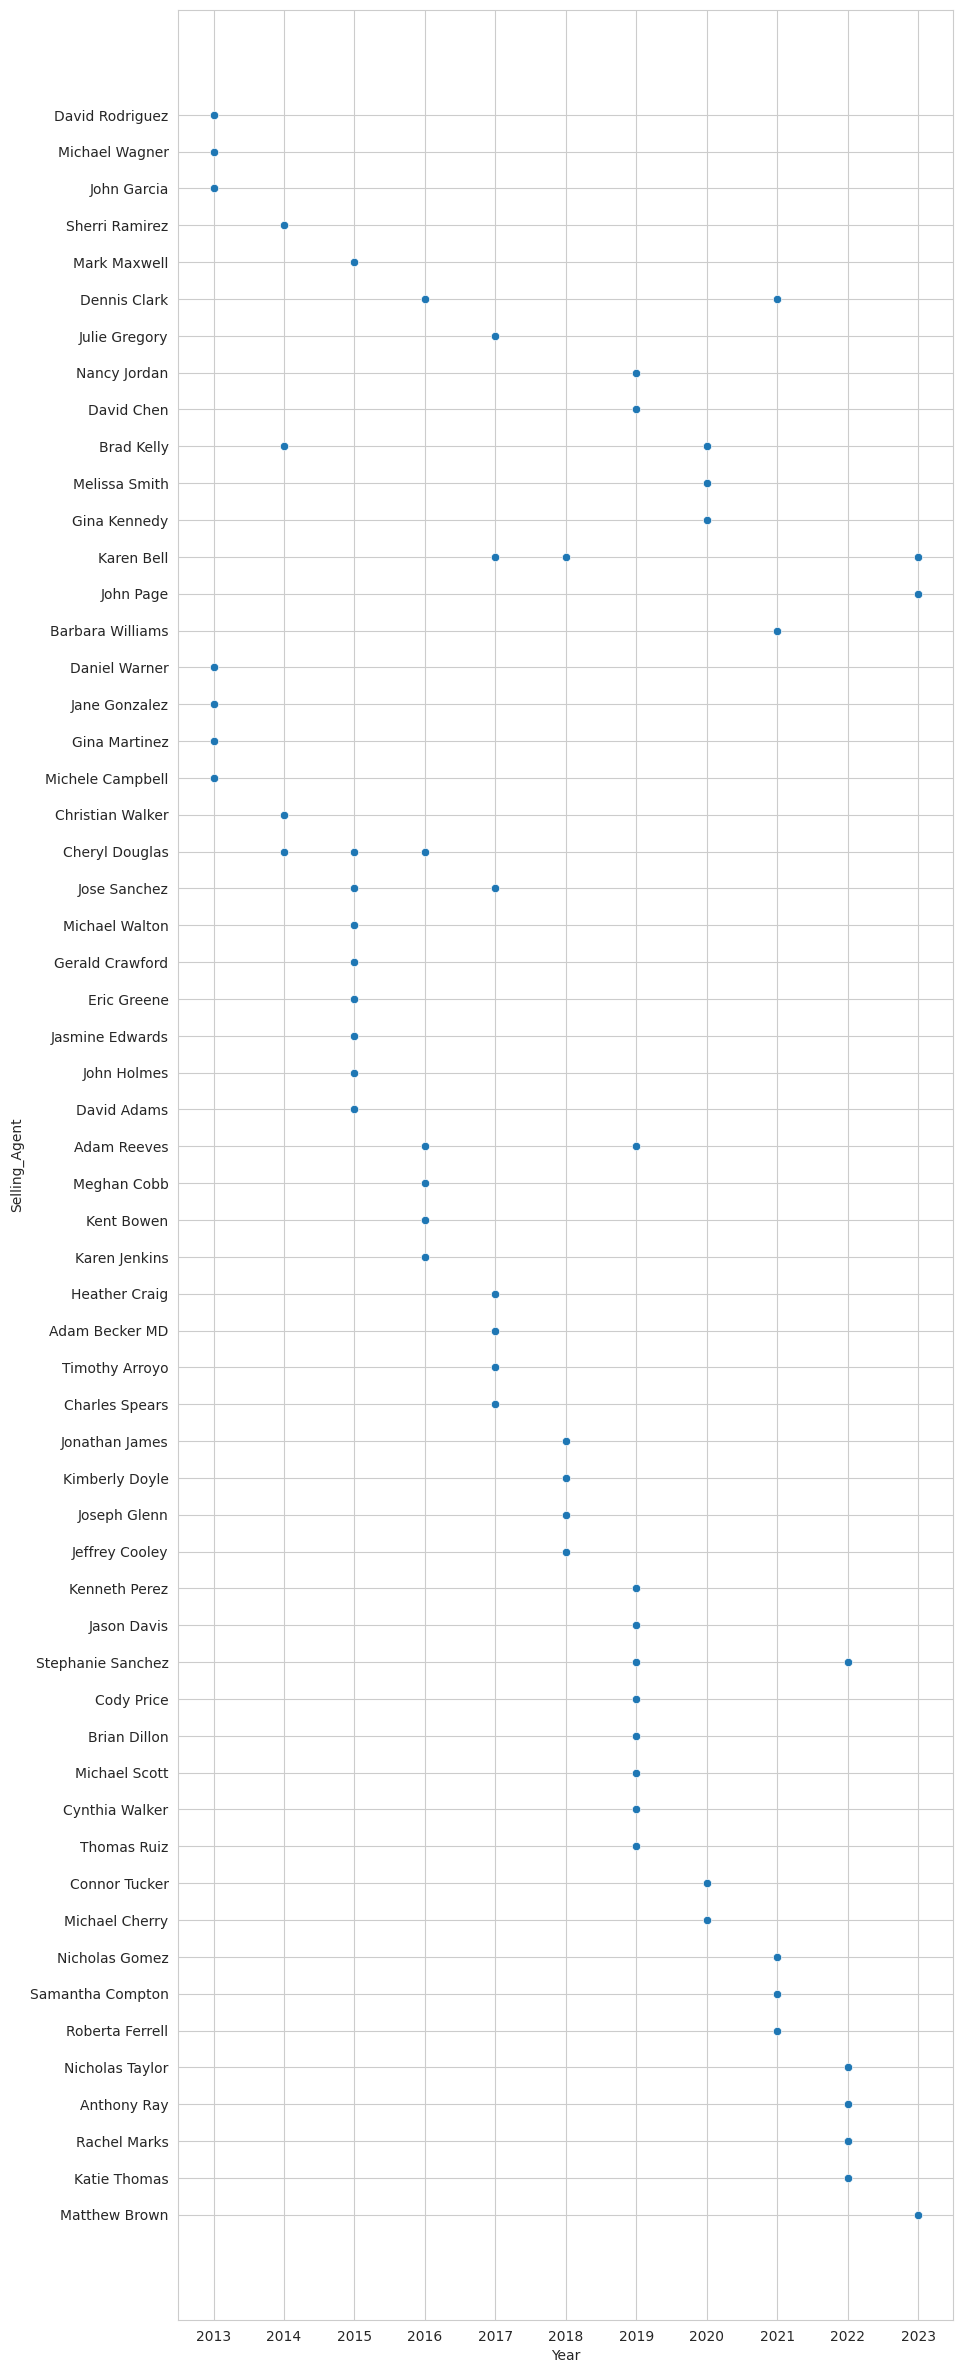

In [67]:
data = Jonathan_Gardner

# Create a subplot with a width of 20 inches and a height of 10 inches.
fig, ax = plt.subplots(figsize=(10, 30))

# Plot the scatterplot.
sns.scatterplot(x= 'Year', y= 'Selling_Agent', data = data, ax=ax)
plt.xticks(range(2013, 2024))

# Year by year facet look

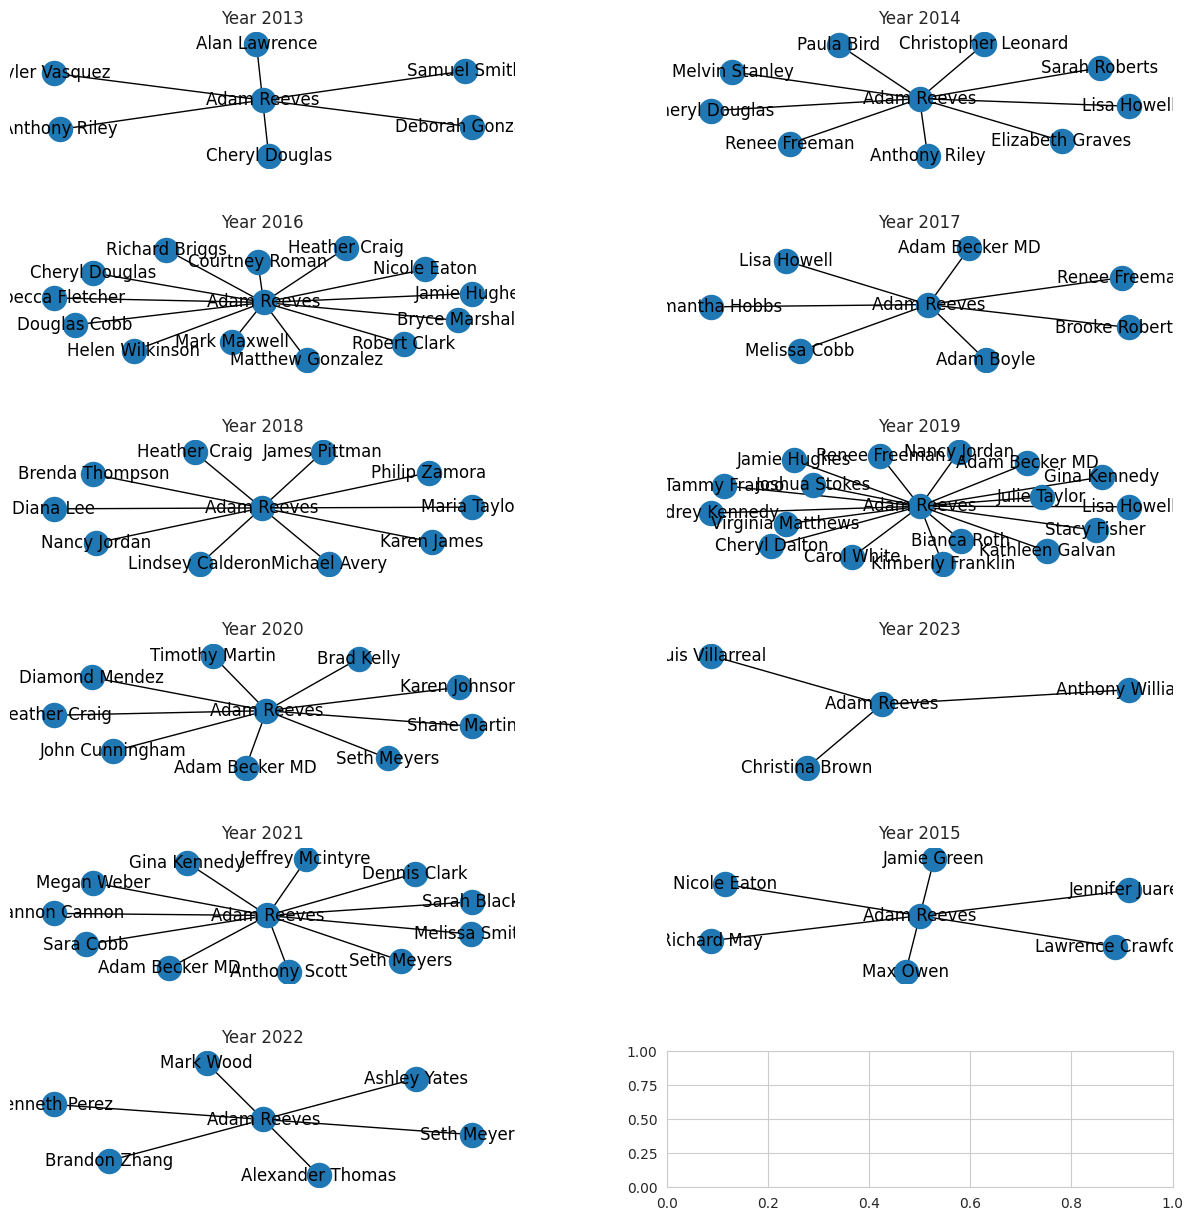

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

Adam_Reeves = df.loc[df['Listing_Agent'] == 'Adam Reeves']

#
data = Adam_Reeves

# Get unique years in your data
unique_years = data['Year'].unique()

# Calculate the number of rows and columns for the grid
num_rows = (len(unique_years) + 1) // 2
num_cols = 2

# Create a grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust spacing between subplots

# Loop through each year and create a plot
for i, year in enumerate(unique_years):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    # Filter the data for the current year
    year_data = data[data['Year'] == year]

    # Create a directed graph from the filtered data
    G = nx.DiGraph()
    G = nx.from_pandas_edgelist(year_data, 'Listing_Agent', 'Selling_Agent')

    # Increase the space between the nodes
    node_spacing = 2

    # Draw the graph on the current subplot
    nx.draw(G, with_labels=True, ax=ax)
    ax.set_title(f'Year {year}')

# Show the plot
plt.show()

## Ideally we would like to have seen a straight line of dots running horizontally from several Selling Agents names.  those would have been the perfect team members for that Listing Agent.

## Let us see what happens if we combine two listing agents

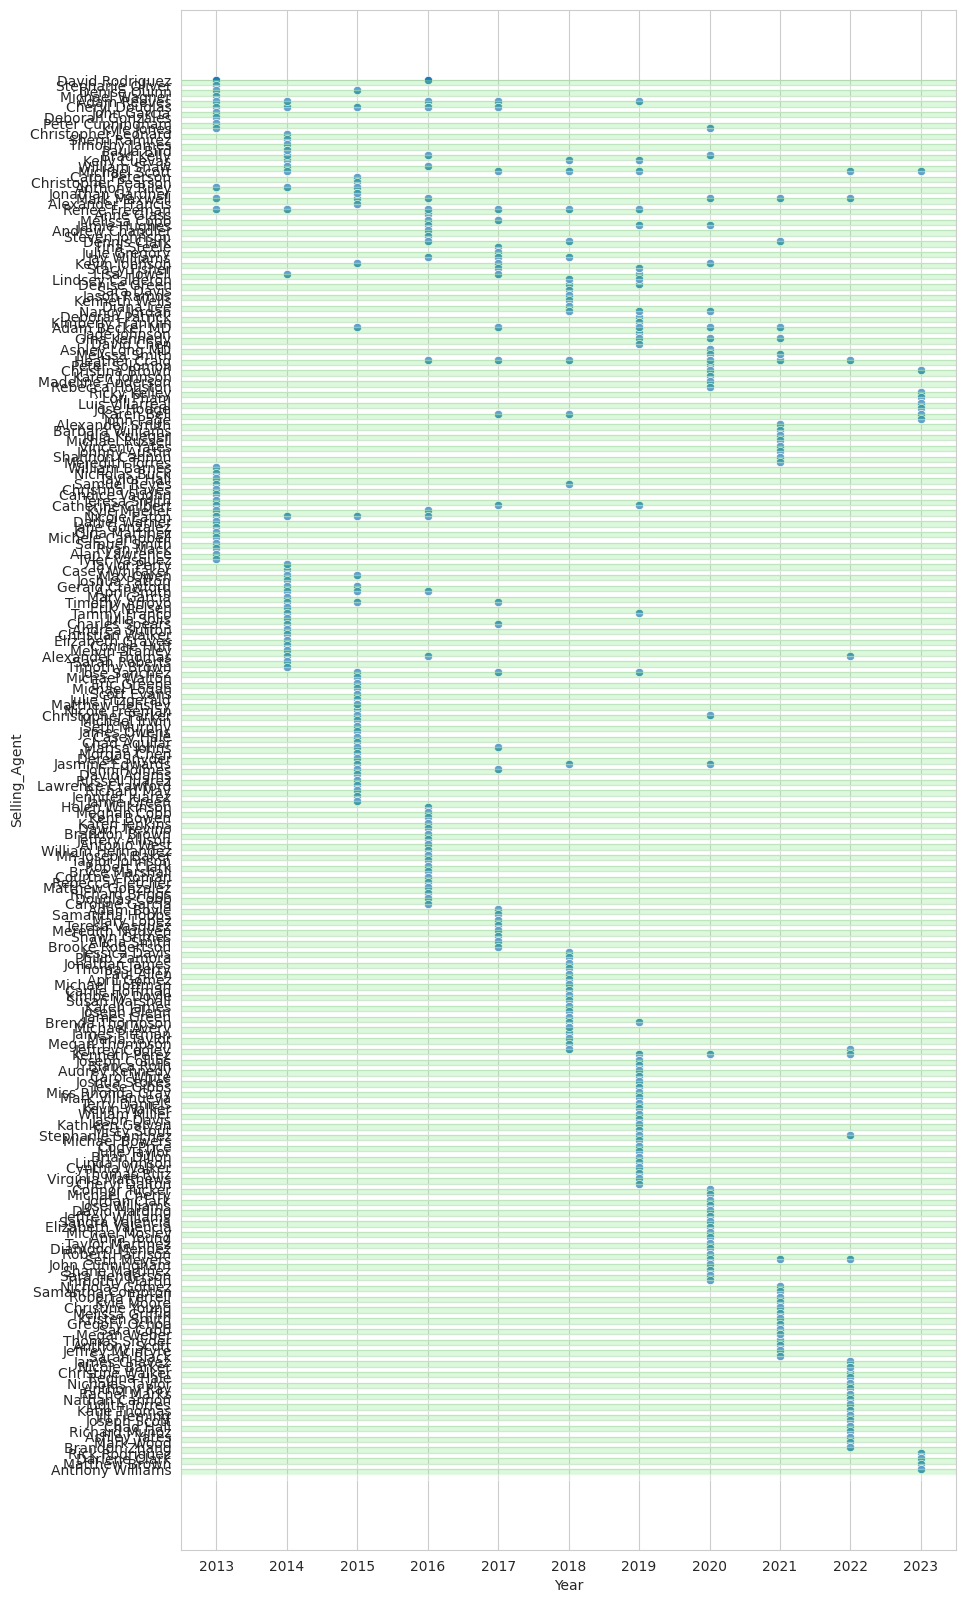

In [73]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create the scatter plot
selling_agents = df
sns.scatterplot(x='Year', y='Selling_Agent', data= selling_agents )

# Set the x tick marks to be every year
plt.xticks(range(2013, 2024))

# Make the plot taller
plt.gcf().set_size_inches(10, 20)

# Define the number of alternating bands and their colors
num_bands = 260  # Change this to the number of desired bands
colors = ['lightgreen', 'white']  # Add more colors as needed

# Iterate through the y-axis range and add alternating bands
for i in range(num_bands):
    band_height = 1  # Height of each band
    band_color = colors[i % len(colors)]  # Alternate the band color
    y_start = i * band_height  # Calculate the starting y-coordinate
    y_end = (i + 1) * band_height  # Calculate the ending y-coordinate
    plt.axhspan(y_start, y_end, alpha=0.3, color=band_color)

plt.show()

Now while these agents are not spectaular in their own whne cobbled together thye out perform a star listting agent.

In [66]:
sorted_Listing_agents

Listing_Agent     Selling_Agent Listing_Date  Year  Agent_Count
50        Adam Reeves    Cheryl Douglas   2013-05-06  2013          107
21   Jonathan Gardner   David Rodriguez   2013-03-05  2013           68
219    Jared Santiago     Michael Scott   2014-11-10  2014           66
39       Mark Maxwell      Denise Quinn   2013-04-15  2013           62
27          Paul Mann  Stephanie Oliver   2013-04-01  2013           53
47   William Williams       Adam Reeves   2013-04-30  2013           51

In [75]:
sorted_Listing_agents

Listing_Agent     Selling_Agent Listing_Date  Year  Agent_Count
50        Adam Reeves    Cheryl Douglas   2013-05-06  2013          107
21   Jonathan Gardner   David Rodriguez   2013-03-05  2013           68
219    Jared Santiago     Michael Scott   2014-11-10  2014           66
39       Mark Maxwell      Denise Quinn   2013-04-15  2013           62
27          Paul Mann  Stephanie Oliver   2013-04-01  2013           53
47   William Williams       Adam Reeves   2013-04-30  2013           51